In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from  scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

<Figure size 720x432 with 0 Axes>

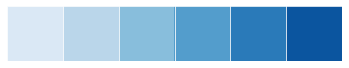

In [3]:
#设置默认sns5种绘图风格darkgrid、whitegrid、dark、white、ticks
sns.set_style("darkgrid")
#设置图像大小
plt.figure(figsize=(10,6))
# 蓝色渐变色
##如果想要翻转渐变，可以在面板名称中添加一个_r后缀
# current_palette = sns.color_palette("Blues_r")  # 蓝色渐变色
current_palette=sns.color_palette("Blues")
# hls颜色空间，均匀间隔8颜色
current_palette2=sns.color_palette("hls",8)
#设置色板
sns.palplot(current_palette)

In [5]:
data_train=pd.read_csv('train.csv')#获取train.csv文件
print(data_train.head())#
print(data_train.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [6]:
# 为了能更好的判断各项特征对“房价”的关系，我们需要花上一点时间来对数据进行研究和处理。
# 虽然比较耗时和费事，但是这会让我们后面构建模型的时候事半功倍。

In [7]:
print(data_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [8]:
# 通过上面的结果可以知道“SalePrice”没有无效或者其他非数值的数据，下面通过图示化来进一步展示“SalePrice”

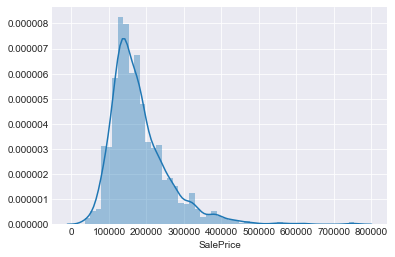

In [9]:
sns.distplot(data_train['SalePrice'])
plt.show()

In [10]:
# 可以看到与使用matplotlib作的直方图最大的区别在于有一条密度曲线（KDE），可以通过设置参数去掉这条默认的曲线。 
# 另外由上图可以知道房价呈现正态分布。下面还可以看到两个统计学中的概念： 峰度（Kurtosis）和 偏度（Skewness）。
# 峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。
# 它是和正态分布相比较的。
# Kurtosis=0 与正态分布的陡缓程度相同。
# Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
# Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 偏度：

# 偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。
# Skewness=0 分布形态与正态分布偏度相同
# Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
# Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

In [11]:
#skewness and kurtosis偏度与峰度
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [12]:
# 将上面的计算结果、理论和图形相对比可以看到，长尾巴确实拖在右边，而且高峰陡峭。

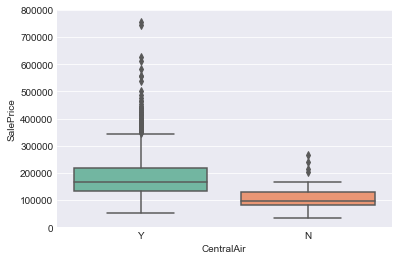

In [13]:
# CentralAir
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data,palette = "Set2")  #or palette = current_palette/"Set2"
fig.axis(ymin=0, ymax=800000);
plt.show()

In [14]:
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
print(data.head())

   SalePrice  OverallQual
0     208500            7
1     181500            6
2     223500            7
3     140000            7
4     250000            8


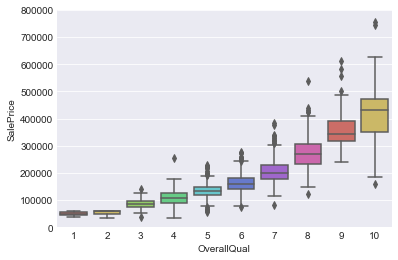

In [15]:
var = 'OverallQual'
data=pd.concat([data_train['SalePrice'],
                data_train[var]],axis=1)
fig=sns.boxplot(x=var,y="SalePrice",data=data,
                palette=current_palette2)
fig.axis(ymin=0,ymax=800000)
plt.show()

In [16]:
corr=data_train.corr()
var="YearBuilt"
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
print(data.head())

   SalePrice  YearBuilt
0     208500       2003
1     181500       1976
2     223500       2001
3     140000       1915
4     250000       2000


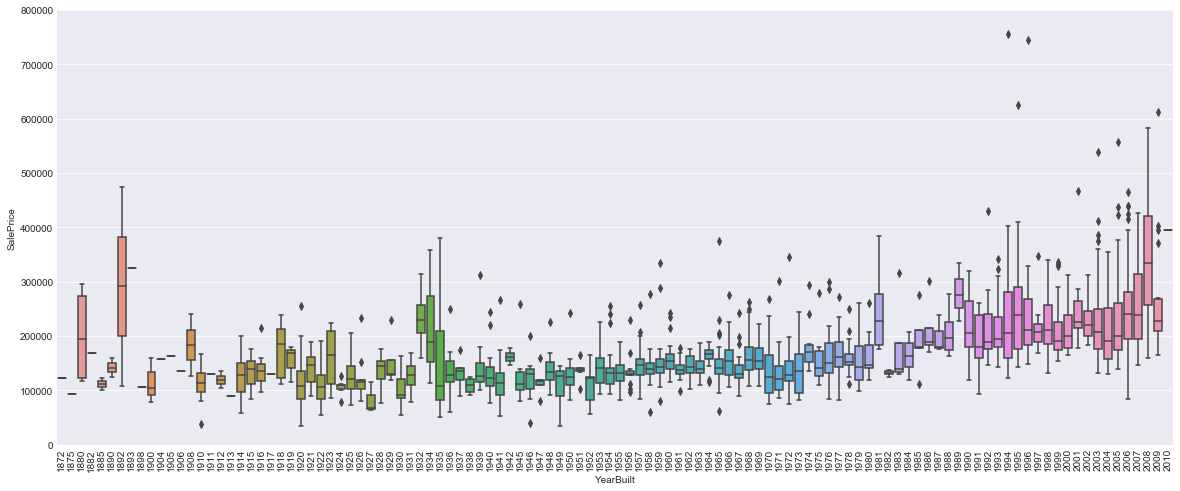

In [17]:
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# x轴标签旋转 https://www.cnblogs.com/lemonbit/p/7419851.html
for item in fig.get_xticklabels(): # 获取x轴标签
    item.set_rotation(90)


In [18]:
#总体趋势为越新的房子，价钱越高

In [19]:
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)

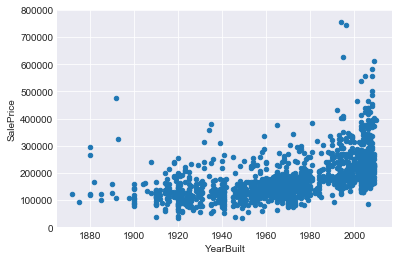

In [20]:
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000))

In [21]:
plt.show()

In [22]:
# 换个角度，从点图可以看到房屋越新，房价也相对比较贵。

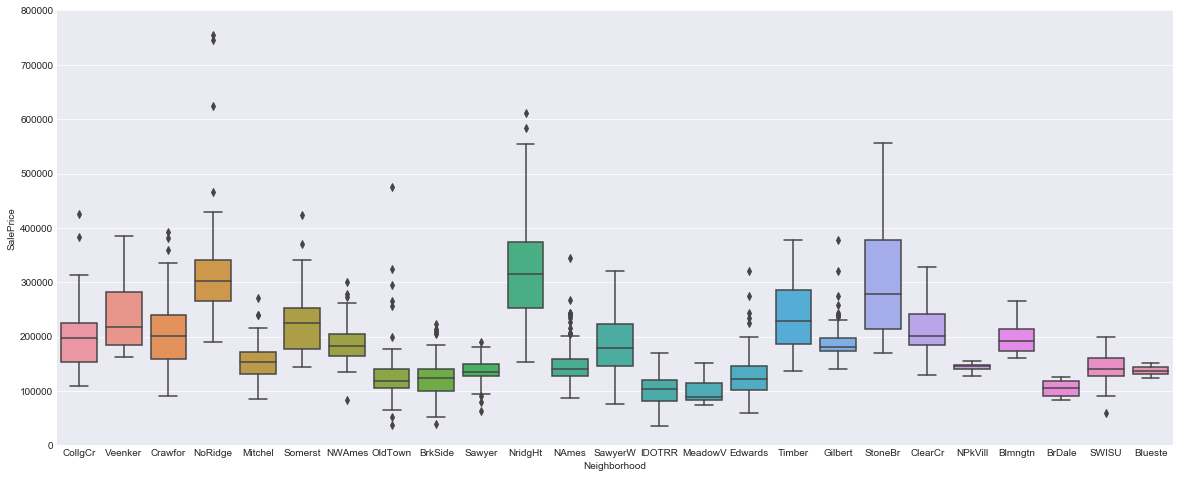

In [23]:
var="Neighborhood"
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
f,ax=plt.subplots(figsize=(20,8))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
plt.show()

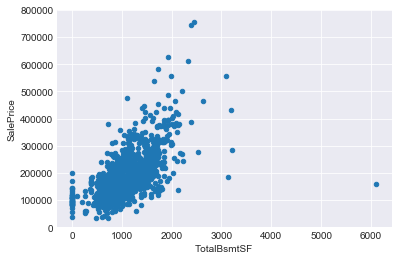

In [24]:
var = 'TotalBsmtSF'
data = pd.concat([data_train[var],data_train['SalePrice']],axis = 1)
data.plot.scatter(0,1,ylim = (0,800000))
plt.show()

In [25]:
# 地下室面积对于房价的影响比较大

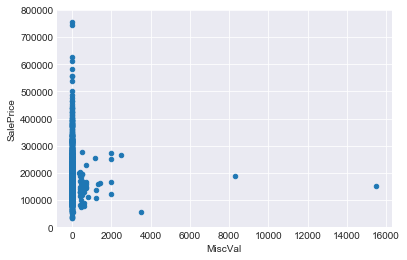

In [26]:
var = 'MiscVal'
data = pd.concat([data_train[var],data_train['SalePrice']],axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000))
plt.show()

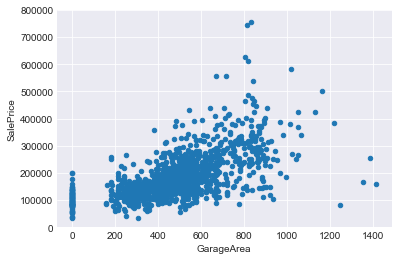

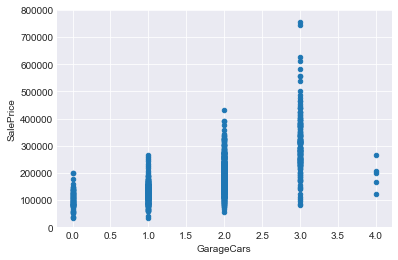

In [27]:
var=["GarageArea","GarageCars"]
for i in range(2):
    data=pd.concat([data_train[var[i]],data_train["SalePrice"]],axis=1)
    data.plot.scatter(0,1,ylim=(0,800000))
plt.show()

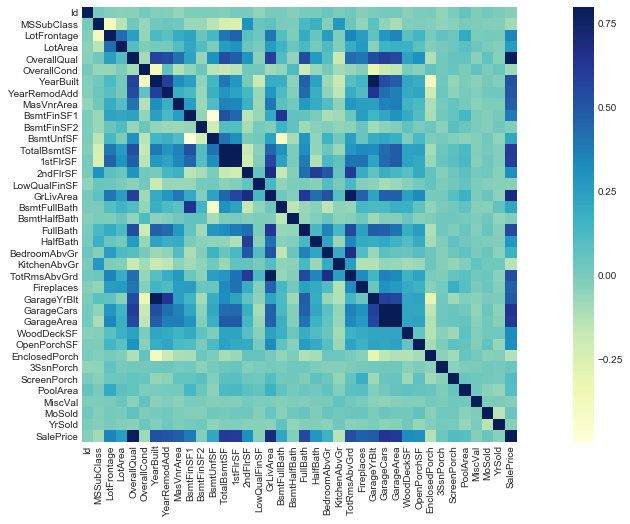

In [28]:
corrmat=data_train.corr()
f,ax=plt.subplots(figsize=(20,8))
sns.heatmap(corrmat,vmax=0.8,square=True,cmap="YlGnBu")
plt.show()

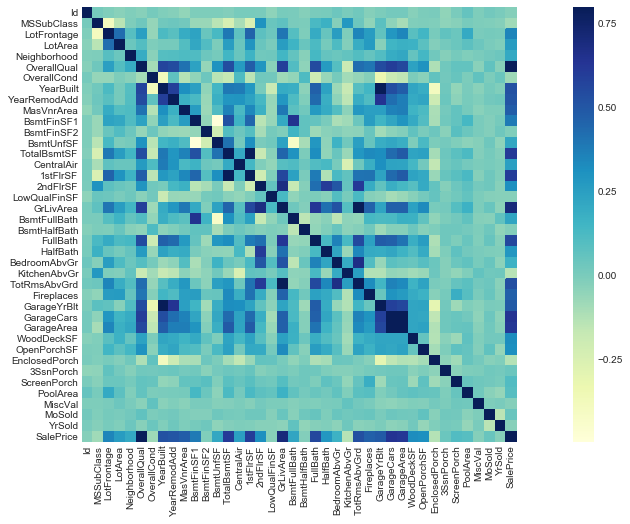

In [29]:
from sklearn import preprocessing
f_names = ['CentralAir','Neighborhood']
for i in f_names:
    label = preprocessing.LabelEncoder()
    data_train[i] = label.fit_transform(data_train[i])
corrmat = data_train.corr() # 相关系数矩阵
# print(corrmat)
f,ax = plt.subplots(figsize=(20,8))
sns.heatmap(corrmat,vmax=0.8,square =True,cmap = 'YlGnBu')
plt.show()

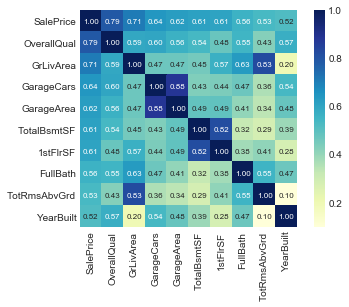

In [30]:
k = 10 # 选择10个变量
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
# sns.set(font_scale = 1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':8},
                 yticklabels=cols.values,xticklabels=cols.values,cmap= 'YlGnBu')
plt.show()

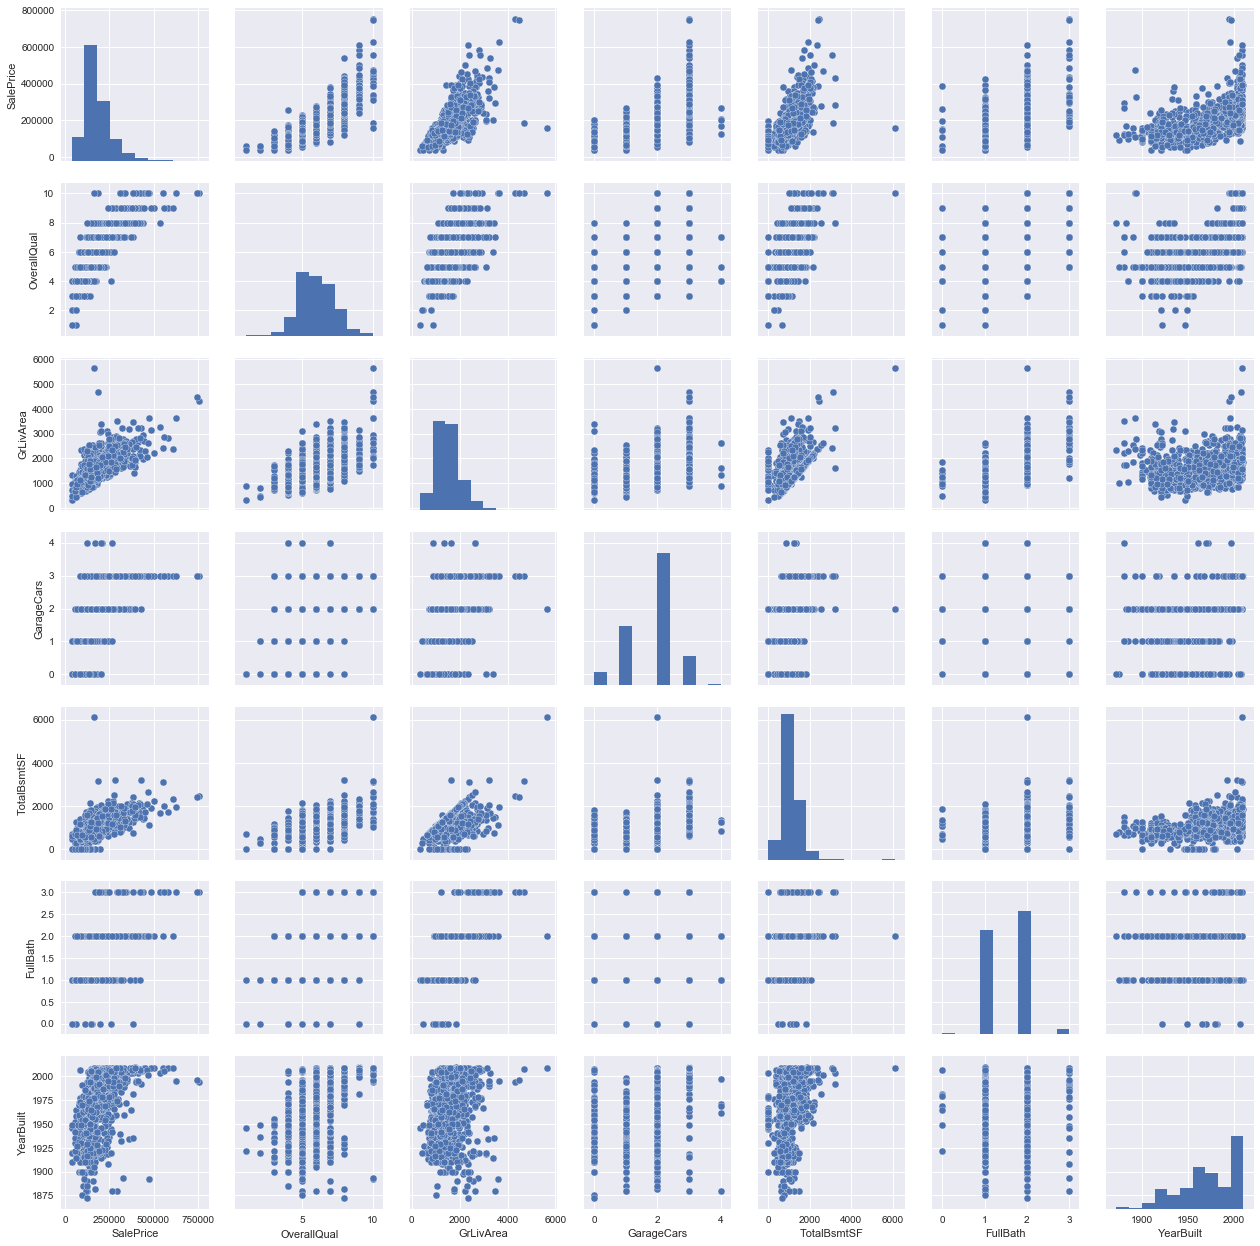

In [31]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea',
        'GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(data_train[cols],size = 2.5)
plt.show()

In [32]:
from sklearn import preprocessing
from sklearn import linear_model,svm,gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
import numpy as np

In [33]:
#获取数据
cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF',
        'FullBath','TotRmsAbvGrd','YearBuilt']
x=data_train[cols].values #提取相应元素特征值
y=data_train["SalePrice"].values #相应价钱矩阵
x_scaled=preprocessing.StandardScaler().fit_transform(x)
y_scaled=preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y_scaled,
                                                 test_size=0.33,random_state=42)

In [34]:
# print(X_train)

In [35]:
clfs = {
    'svm':svm.SVR(),
    'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
    'BayesianRidge':linear_model.BayesianRidge()
}
for clf in clfs:
    try:
        clfs[clf].fit(X_train,y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf+'cost:'+str(np.sum(y_pred-y_test)/len(y_pred)))
    except Exception as e:
        print(clf+'ERROR:')
        print(str(e))

svmcost:-17.96730634760857
RandomForestRegressorcost:-1.6052144345202568
BayesianRidgecost:-17.19150469291163


In [36]:
# 由上面结果选择随机森林回归算法，
# 为了更直观地观察训练结果，我将显示一下未归一化数据的预测效果。

In [37]:
cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
X_train,X_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.33,
                                                 random_state=42)
clf=RandomForestRegressor(n_estimators=4000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(y_pred)

[141575.83125    308466.21325    124603.23375    172425.25125
 308554.104       78538.64107143 191688.9465     153239.6575
  78738.37142857 115555.38666667 162339.842      122744.5625
  94247.0375     222486.8255     188155.45625    121934.15208333
 194251.45375    131328.51458333 118561.58625    196921.777
 163869.17475    217401.91458929 170396.65054762 124796.11029762
 186918.9715     167409.56152083 201482.8925      97352.26875
 186999.25625    204634.79       110714.482      235221.37125
 176752.002      110315.28571429 257326.3695     141935.2125
 160450.09475    206128.30525    306755.7485     106220.83958333
 132872.04366667 230548.3765     119419.31416667 372345.75525
 139448.70875    165826.021      125958.28422619 115618.47541667
 434968.88775    145846.17058333 118949.57678571 185822.24375
 125462.43996012 340893.52525    144106.41102673 243182.261
 195760.83642857 154075.575      152076.9875     102542.09583333
  81107.57142857 140115.56875    311846.03       299836.0155
 

In [38]:
 #保存clf，共下面计算测试集数据使用
 # rfr=clf
 print(y_test)

[154500 325000 115000 159000 315500  75500 311500 146000  84500 135500
 145000 130000  81000 214000 181000 134500 183500 135000 118400 226000
 155000 210000 173500 129000 192000 153900 181134 141000 181000 208900
 127000 284000 200500 135750 255000 140000 138000 219500 310000  97000
 114500 205000 119500 253293 128500 117500 115000 127000 451950 144000
 119000 196000 115000 287000 144500 260000 213000 175000 107000 107500
  68500 154000 317000 264132 283463 243000 109000 305000  93500 176000
 118858 134000 109008  93500 611657 173000 348000 341000 141000 124900
 118000  67000 113000  91300 149500 133000 266000 190000 155900 155835
 153500 152000 124500 301000 136500 169990 205000 183900 204900 260000
 163500 224900 244000 132000 194000 156500 156000 275000 145000 135000
  60000 124000 127000 137500 213500 119000 107900 123000 112000 284000
 133000 149000 169000 207000 175000 137000 236000  79500 144000 162900
 185900 369900 197900 104000  35311 337500 367294 130250 230000 755000
 40300

In [39]:
sum((abs(y_pred-y_test))/len(y_pred))

19631.657676080915

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
rfr=clf

In [41]:
data_test=pd.read_csv("test.csv")
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [42]:
# 因为数据中存在缺失值，所以不能直接predict，
# 而且缺失值较少，可直接在excel文件中将缺失值改为了该列的均值，所以需要先算出平均值。

In [43]:
data_test["GarageCars"].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [44]:
data_test['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [45]:
data_test = pd.read_csv('test.csv')
data_test[ ['GarageCars'] ].fillna(1.766118, inplace=True)
data_test[ ['TotalBsmtSF']].fillna(1046.117970, inplace=True) 
data_test[cols].fillna(data_test[cols].mean())
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [46]:
cols2 = ['OverallQual','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
cars = data_test['GarageCars'].fillna(1.766118)
bsmt = data_test['TotalBsmtSF'].fillna(1046.117970)
data_test_x = pd.concat( [data_test[cols2], cars, bsmt] ,axis=1)
data_test_x.isnull().sum()

OverallQual     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
dtype: int64

In [47]:
x = data_test_x.values
y_te_pred = rfr.predict(x)
print(y_te_pred)

print(y_te_pred.shape)
print(x.shape)

[ 94490.8325     106861.76629167 135556.008      ... 100640.9985
  94950.36166667 175562.1235    ]
(1459,)
(1459, 7)


In [48]:
print(data_test_x)

      OverallQual  GrLivArea  FullBath  TotRmsAbvGrd  YearBuilt  GarageCars  \
0               5        896         1             5       1961         1.0   
1               6       1329         1             6       1958         1.0   
2               5       1629         2             6       1997         2.0   
3               6       1604         2             7       1998         2.0   
4               8       1280         2             5       1992         2.0   
5               6       1655         2             7       1993         2.0   
6               6       1187         2             6       1992         2.0   
7               6       1465         2             7       1998         2.0   
8               7       1341         1             5       1990         2.0   
9               4        882         1             4       1970         2.0   
10              7       1337         2             5       1999         2.0   
11              6        987         1             5

In [49]:
prediction = pd.DataFrame(y_te_pred,columns=['SalePrice'],)
result = pd.concat([data_test['Id'],prediction],axis=1)
print(result.columns)
print(result.round(2))

Index(['Id', 'SalePrice'], dtype='object')
        Id  SalePrice
0     1461   94490.83
1     1462  106861.77
2     1463  135556.01
3     1464  161623.01
4     1465  174315.28
5     1466  163468.53
6     1467  117708.50
7     1468  148405.08
8     1469  131183.31
9     1470   79888.58
10    1471  142051.92
11    1472   98421.21
12    1473   96645.20
13    1474  145282.66
14    1475  119132.79
15    1476  283469.31
16    1477  177368.21
17    1478  251760.35
18    1479  178441.44
19    1480  336344.12
20    1481  195851.04
21    1482  174345.68
22    1483  122139.59
23    1484  136445.49
24    1485  143227.30
25    1486  158535.12
26    1487  215440.48
27    1488  172800.52
28    1489  136769.17
29    1490  148118.79
...    ...        ...
1429  2890   71373.46
1430  2891  162653.81
1431  2892   62052.84
1432  2893  122750.56
1433  2894   69607.51
1434  2895  173053.07
1435  2896  171974.98
1436  2897  162236.07
1437  2898  163825.37
1438  2899  177429.24
1439  2900  118916.06
1440  2901 

In [50]:
result.to_csv('Predictions.csv',index = False)